# **1. INTRODUCTION**

# a. Defining the question

Predict whether the chance of an email sent is spam or not

# b. Defining the Metric for success

Our model would be considered a success if it is able to compute an accuracy score of at least 80%.

# c. Understanding the context

This dataset is from UCI machine learning repository, and we're going to use it to classiy whether an email is spam or not. Source:

Creators: Mark Hopkins, Erik Reeber, George Forman, Jaap Suermondt

Hewlett-Packard Labs, 1501 Page Mill Rd., Palo Alto, CA 94304

Donor: George Forman (gforman at nospam hpl.hp.com) 650-857-7835

Generated: June-July 1999

It has previously been used for determining whether an email is spam or not, which means that this data is relevant and sufficient for this analysis.

Data description: The first 54 features (continuous, real [0,100] indicate the percent of words in an email matching a particular word (any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string) or character. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters (continuous real/integer [1,...]. The last attribute (nominal {0,1} class) denotes whether the e-mail was considered spam (1) or not (0).

The data provided is a csv file with two accompanying text documentation files.

# d. Data Relevance

This can be used by companies that do advertising in order to know on ow to send the emails and not always fall on the spam which atimes could go unviwed.

# e. Recording the Experimental Design

a) Business Understanding

b) Data Understanding

c) Data Cleaning

d) EDA

e) Modeling

f) Evaluation

# **2. DATA UNDERSTANDING**

# Reading the dataset

In [1]:
# Importing the necessary libaries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [6]:

# Defining the column names
col_list=['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail',
'word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses',
'word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your',
'word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george',
'word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data',
'word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm',
'word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project',
'word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_;','char_freq_(',
'char_freq_[','char_freq_exclamation','char_freq_dollar','char_freq_hashtag','capital_run_length_average',
'capital_run_length_longest','capital_run_length_total','spam']

spam=pd.read_csv('spambase.data', names=col_list)
spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_exclamation,char_freq_dollar,char_freq_hashtag,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


# Checking the Data

In [7]:
# Let's preview the shape of our dataset
print('The spambase dataset has '+str(spam.shape))

The spambase dataset has (4601, 58)


In [8]:
# we also need to preview the datatypes of our dataset
spam.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

Apart from the last three columns with integers, all others have floating data types

In [10]:
# previewing the information of our dataset
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

Despite the fact that the output reveals that there is no missing values, we shall still do the data cleaning to checking for any anomalies or duplicates

# **3. DATA CLEANING**

# Checking for Anomalies

In [11]:
# we check for duplicates in the dataset
# 
print(spam.duplicated().any())

# If any, print the sum of duplicates
print(spam.duplicated().sum())

True
391


There are 391 duplicated values in our dataset, which we shall remove

In [12]:
# Dealing with duplicates

spam.drop_duplicates(keep='first', inplace = True)

print(spam.duplicated().any())


False


We have dropped the 391 duplicate values

# Checking for missing data

In [13]:
# Identifying the Missing Data
spam.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

There are no null values in the various features

# **4. EXPLORATORY DATA ANALYSIS**

In [14]:
# Let's preview the statistical summary of our dataset
spam.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_exclamation,char_freq_dollar,char_freq_hashtag,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,...,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000
mean,0.104366,0.112656,0.291473,0.063078,0.325321,0.096656,0.117475,0.108000,0.091860,0.248420,...,0.040403,0.144048,0.017376,0.281136,0.076057,0.045798,5.383896,52.139905,291.181948,0.398812
std,0.300005,0.454260,0.515719,1.352487,0.687805,0.276030,0.397284,0.410282,0.282144,0.656638,...,0.252533,0.274256,0.105731,0.843321,0.239708,0.435925,33.147358,199.582168,618.654838,0.489712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627500,7.000000,40.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.500000,0.000000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,...,0.000000,0.194000,0.000000,0.331000,0.053000,0.000000,3.706750,44.000000,273.750000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


0    2531
1    1679
Name: spam, dtype: int64


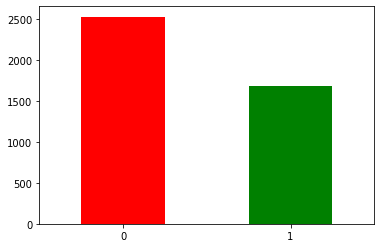

In [15]:
# checking how many are spam and how many are not
spam.spam.value_counts().plot(kind = 'bar', rot = 0, color = ['red', 'green'])
print(spam.spam.value_counts())

The output reveals that the emails marked as spam(1679) are less than those unmarked as spam(2531)

# **5. Implementing the Solution**

# Logistic Regression Model

We are going to use this model as our baseline for model accuracy comparison with the Naives Bayes classifier

In [16]:
# Importing the libraries we are going to use
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, r2_score,mean_absolute_error, mean_squared_error
import scipy.stats as stats

In [17]:
# x=independent variable
# y=target variable
# we define each variable 
X = spam.drop(columns = ['spam'], axis=1)
y = spam['spam']
# 
# The split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=0)
# 
# Then standardise the X_train and the X_test to the same scale
sc = StandardScaler()
# We then train our model
# 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# 
# Fit the model and Make predictions using the model above
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

preds = logmodel.predict(X_test)
# 
# compute the accuracy of our model
print("Our logistic Regression model accuracy is", accuracy_score(y_test,preds))

Our logistic Regression model accuracy is 0.9251781472684085


As our baseline model, the logistic regression model gives us an accuracy score of 92.51% which indicates that our model has good perfromance

# Naives Bayes Classifier

# Gaussian NB

In [26]:
# importing the libaries we shall use
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, r2_score,mean_absolute_error, mean_squared_error


In [20]:
# we first identify the dependent and independent variable
# 
X = spam.drop(columns = ['spam'], axis=1)
y = spam['spam']
# 
# Split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=0)
# 
# Train our model

clf = GaussianNB()  
model = clf.fit(X_train, y_train) 
# 
# Predict our test prediction and print our accuracy score

predicted = model.predict(X_test)
print("Naives Bayes model accuracy for (80-20) is", accuracy_score(y_test,predicted))

Naives Bayes model accuracy for (80-20) is 0.8206650831353919


In [23]:
# using our above imported libraries
# we shall also make predictions of 70-30 split

X = spam.drop(columns = ['spam'], axis=1)
y = spam['spam']
# 
# Split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=0)
# 
# Train our model

clf = GaussianNB()  
model = clf.fit(X_train, y_train) 
# 
# Predict our test prediction and print our accuracy score

predicted = model.predict(X_test)
print("Naives Bayes model accuracy for (70-30) is", accuracy_score(y_test,predicted))

Naives Bayes model accuracy for (70-30) is 0.833729216152019


In [24]:
# now, let's use a 60-40 split to make our model accuracy prediction
X = spam.drop(columns = ['spam'], axis=1)
y = spam['spam']
# 
# Split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.40, random_state=0)
# 
# Train our model

clf = GaussianNB()  
model = clf.fit(X_train, y_train) 
# 
# Predict our test prediction and print our accuracy score

predicted = model.predict(X_test)
print("Naives Bayes model accuracy for (60-40) is", accuracy_score(y_test,predicted))

Naives Bayes model accuracy for (60-40) is 0.8319477434679335


Without our baseline model having an accuracy of 92.51%, the comparison among our 3 naives bayes classifier model gives the following output:

80-20 split: has an accuracy score of 82.06%

70-30split: has an accuracy score of 83.37%

while the 60-40 split has an accuracy score of 83.19%.

# Using LDA to improve the perfomance of our model

In [27]:
# importing the sklearn libraries we shall use

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [28]:
# assign values to our X, and Y variables
X = spam.iloc[:, 0:-1].values
y = spam.iloc[:, -1].values
# 
# We then split the data to train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Performing feature scaling which is done on the independent variables to normalize the data to a particular range

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
# Performing Linear Discriminant Analysis(LDA)
lda = LDA(n_components=1)
L_train = lda.fit_transform(X_train, y_train)
L_test = lda.transform(X_test)
# 
# We will use the random forest classifier to evaluate the performance of a PCA-reduced algorithms as shown below
# when training and making predictions

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(L_train, y_train)
y_pred = classifier.predict(L_test)

In [32]:
# Evaluating our model performance using the confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix )
print('LDA Accuracy is '+ str(accuracy_score(y_test, y_pred)))

[[453  42]
 [ 35 312]]
LDA Accuracy is 0.9085510688836105


From the results, our model can correctly make 765 predictions and 77 are off predictions. the model accuracy is 90.85% which improved from that of the naives bayes classifier models. 

# **6. EVALUATION**

From the analysis, our model accuracy is above 80% which means, it can make good predictions